## Import modules

In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Directory

In [4]:
adata_dir = '/nfs/team205/heart/anndata_objects/8regions'

## Read in data

In [5]:
cell = sc.read_h5ad(f'{adata_dir}/QC/scRNA_adult.h5ad')

# tidy up .var
cell.var=cell.var[['gene_name']]
cell.var.rename(columns={'gene_name':'gene_name_scRNA'},inplace=True)

cell

AnnData object with n_obs × n_vars = 151666 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_name_scRNA'
    obsm: 'latent_gene_encoding'

In [6]:
nuc = sc.read_h5ad(f'{adata_dir}/QC/snRNA_adult.h5ad')

# tidy up .var
nuc.var=nuc.var[['gene_name']]
nuc.var.rename(columns={'gene_name':'gene_name_snRNA'},inplace=True)

nuc

AnnData object with n_obs × n_vars = 369099 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_name_snRNA'
    obsm: 'latent_gene_encoding'

In [7]:
multi = sc.read_h5ad(f'{adata_dir}/QC/multiome_RNA_adult.h5ad')

# tidy up .var
multi.var=multi.var[['gene_name']]
multi.var.rename(columns={'gene_name':'gene_name_multiome'},inplace=True)

multi

AnnData object with n_obs × n_vars = 164133 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_name_multiome'
    obsm: 'latent_gene_encoding'

In [9]:
multi.var.head()

,gene_name_multiome
id,
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,AL627309.1
ENSG00000239945,AL627309.3


## Add souporcell result to multiome data 

* cls_184: HCAHeartST11350184_HCAHeartST11121842
* cls_187: HCAHeartST11350187_HCAHeartST11121845

In [10]:
# read in and concatenate
soc_184 = pd.read_csv('/nfs/team205/heart/mapped/cellranger-arc200/SOC_out/HCAHeartST11350184_HCAHeartST11121842/ATAC_SOC_common_variants/clusters_donor-distinguished.csv', index_col=0)
soc_187 = pd.read_csv('/nfs/team205/heart/mapped/cellranger-arc200/SOC_out/HCAHeartST11350187_HCAHeartST11121845/ATAC_SOC_common_variants/clusters_donor-distinguished.csv', index_col=0)

soc = pd.concat([soc_184, soc_187], axis=0)
soc

,barcode,status,assignment,log_prob_singleton,log_prob_doublet,cluster0,cluster1,donor_predicted,barcode_mod
0,AAACCAACATCTAGCA-1,doublet,0/1,-252.003419,-224.977408,-252.003419,-346.808304,doublet,HCAHeartST11350184_HCAHeartST11121842_AAACCAAC...
1,AAACCAACATGCAACC-1,doublet,0/1,-288.284411,-260.402236,-288.284411,-442.248382,doublet,HCAHeartST11350184_HCAHeartST11121842_AAACCAAC...
2,AAACCGAAGGTAACGA-1,singlet,1,-665.436017,-1081.620595,-1811.369579,-665.436017,AH1,HCAHeartST11350184_HCAHeartST11121842_AAACCGAA...
3,AAACCGCGTTAATCGG-1,singlet,1,-268.993607,-463.228350,-779.368013,-268.993607,AH1,HCAHeartST11350184_HCAHeartST11121842_AAACCGCG...
4,AAACCGCGTTCATCTA-1,singlet,0,-2637.122174,-3357.156123,-2637.122174,-7364.222276,A61,HCAHeartST11350184_HCAHeartST11121842_AAACCGCG...
...,...,...,...,...,...,...,...,...,...
913,TTTGGTAAGGTCGATT-1,singlet,1,-528.369898,-994.608132,-1668.065017,-528.369898,AH1,HCAHeartST11350187_HCAHeartST11121845_TTTGGTAA...
914,TTTGTGAAGCATGAAG-1,singlet,1,-2639.159898,-4742.346814,-7849.850819,-2639.159898,AH1,HCAHeartST11350187_HCAHeartST11121845_TTTGTGAA...
915,TTTGTGGCAATCCCTT-1,singlet,1,-608.426084,-1051.713945,-1700.545157,-608.426084,AH1,HCAHeartST11350187_HCAHeartST11121845_TTTGTGGC...
916,TTTGTGTTCCAAGTTA-1,singlet,1,-234.339311,-422.252106,-692.427089,-234.339311,AH1,HCAHeartST11350187_HCAHeartST11121845_TTTGTGTT...


In [11]:
# add 'donor_predicted' result to the multiome object
df = multi.obs.reset_index().copy()
df = df.merge(soc[['barcode_mod','donor_predicted']],how='left',left_on='barcode',right_on='barcode_mod')
df.drop('barcode_mod',axis='columns',inplace=True)
df.set_index('barcode',inplace=True)

multi.obs = df.copy()
multi.obs.head()

,latent_RT_efficiency,latent_cell_probability,latent_scale,sangerID,combinedID,donor,donor_type,region,region_finest,age,...,doublet_bh_pval,n_genes,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,donor_predicted
barcode,,,,,,,,,,,,,,,,,,,,,
HCAHeart9508627_HCAHeart9508819_AGGAAACGTTTATCGC-1,10.730612,1.0,42174.875000,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,...,0.776992,18356,685946.0,18356,685946.0,5233.0,0.762888,3275.0,0.477443,NaN
HCAHeart9508627_HCAHeart9508819_CACTAGCCATAATGAG-1,10.228636,1.0,42687.246094,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,...,0.776992,18152,638727.0,18152,638727.0,5685.0,0.890052,3168.0,0.495987,NaN
HCAHeart9508627_HCAHeart9508819_CGTTTCTCAACTAACT-1,9.976335,1.0,36491.726562,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,...,0.776992,17232,528518.0,17232,528518.0,2407.0,0.455424,2306.0,0.436314,NaN
HCAHeart9508627_HCAHeart9508819_TGTAAGTGTAAGCACC-1,9.076878,1.0,42754.671875,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,...,0.776992,17748,517194.0,17748,517194.0,4322.0,0.835663,2657.0,0.513734,NaN
HCAHeart9508627_HCAHeart9508819_ACGTTACAGCATTTCT-1,10.063547,1.0,31437.021484,HCAHeart9508627,HCAHeart9508627_HCAHeart9508819,D3,DBD,LV,LV,55-60,...,0.776992,16344,470623.0,16344,470623.0,1786.0,0.379497,1508.0,0.320426,NaN


<AxesSubplot:xlabel='donor_predicted', ylabel='scrublet_score'>

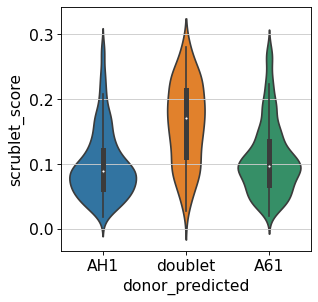

In [12]:
# just checking the association of 'doublet' and scrublet score

df = multi.obs.copy()

df = df[df['combinedID'].isin(['HCAHeartST11350184_HCAHeartST11121842','HCAHeartST11350187_HCAHeartST11121845'])]
df = df[['scrublet_score','cluster_scrublet_score','doublet_pval','doublet_bh_pval','donor_predicted']]

sns.violinplot(x='donor_predicted',y='scrublet_score',data=df)
# sns.violinplot(x='donor_predicted',y='doublet_pval',data=df)
# sns.violinplot(x='donor_predicted',y='doublet_bh_pval',data=df)

## Remove observations which weren't assigned genotypes by souporcell

Modifying donor culumns
* For AH1_A61
    - move 'donor'('AH1-A61') to 'donor_physical'
    - move predicted donor label to 'donor'
    - keep 'donor_predicted' columns
* For others
    copy 'donor' to 'donor_physical'

In [13]:
# separate
AH1_A61 = multi[multi.obs['combinedID'].isin(['HCAHeartST11350184_HCAHeartST11121842','HCAHeartST11350187_HCAHeartST11121845'])]
multi = multi[multi.obs['combinedID'].isin(['HCAHeartST11350184_HCAHeartST11121842','HCAHeartST11350187_HCAHeartST11121845'])==False]

# select assigned observations
AH1_A61 = AH1_A61[AH1_A61.obs['donor_predicted'].isin(['A61','AH1'])]

# add 'donor_physical' and modify 'donor' column
AH1_A61.obs['donor_physical']='AH1-A61'
AH1_A61.obs['donor']=AH1_A61.obs['donor_predicted'].astype('str').copy()
multi.obs['donor_physical']=multi.obs['donor'].astype('str').copy()

# re-concatenate
multi = multi.concatenate(AH1_A61, join='inner', batch_key=None, index_unique=None)
multi

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 163708 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'donor_predicted', 'donor_physical'
    var: 'gene_name_multiome'
    obsm: 'latent_gene_encoding'

In [14]:
# add 'donor_physical' column
cell.obs['donor_physical']=cell.obs['donor'].astype('str').copy()
nuc.obs['donor_physical']=nuc.obs['donor'].astype('str').copy()

## Concatenate data

In [15]:
adata = cell.concatenate(nuc, multi, join='inner', batch_key=None, index_unique=None)
adata

AnnData object with n_obs × n_vars = 684473 × 32732
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'donor_physical', 'donor_predicted'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_name_multiome-2'
    obsm: 'latent_gene_encoding'

In [16]:
adata.obs['donor'].value_counts()

D6     82476
D11    67017
AH1    60772
D7     57121
D2     45881
A61    42005
H5     39576
D8     37031
H3     34169
H7     33184
D3     31937
D5     30059
D4     28960
H6     28726
H4     26613
H2     22959
D1     15987
Name: donor, dtype: int64

In [17]:
adata.obs['donor_physical'].value_counts()

D6         82476
D11        67017
AH1        60146
D7         57121
D2         45881
A61        40769
H5         39576
D8         37031
H3         34169
H7         33184
D3         31937
D5         30059
D4         28960
H6         28726
H4         26613
H2         22959
D1         15987
AH1-A61     1862
Name: donor_physical, dtype: int64

In [18]:
# save
adata.write(f'{adata_dir}/RNA_adult-8reg_raw.h5ad')

... storing 'sangerID' as categorical
... storing 'combinedID' as categorical
... storing 'donor' as categorical
... storing 'donor_type' as categorical
... storing 'region' as categorical
... storing 'region_finest' as categorical
... storing 'age' as categorical
... storing 'gender' as categorical
... storing 'facility' as categorical
... storing 'cell_or_nuclei' as categorical
... storing 'modality' as categorical
... storing 'kit_10x' as categorical
... storing 'flushed' as categorical
... storing 'scrublet_leiden' as categorical
... storing 'donor_physical' as categorical
... storing 'donor_predicted' as categorical


## Pre-process

In [19]:
# preserve raw count
adata.layers["counts"] = adata.X.copy()

# filter genes
sc.pp.filter_genes(adata, min_cells=3)

# normalise and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.shape

filtered out 1349 genes that are detected in less than 3 cells
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
normalizing counts per cell
    finished (0:00:05)


(684473, 31383)

## Set batch_key

In [20]:
# combining Donor, Cell_or_Nuclei, and Kit_10X
adata.obs['batch_key']=adata.obs['donor'].astype('str')+'_'+adata.obs['cell_or_nuclei'].astype('str')+'_'+adata.obs['kit_10x'].astype('str')
adata.obs['batch_key'].value_counts()

AH1_Nuclei_Multiome-v1    60772
D11_Cell_3prime-v3        53051
D2_Nuclei_3prime-v2       45881
D6_Cell_3prime-v2         42433
A61_Nuclei_Multiome-v1    42005
H5_Nuclei_3prime-v3       39576
D8_Nuclei_Multiome-v1     37031
H3_Nuclei_3prime-v3       34169
H7_Nuclei_3prime-v3       33184
H6_Nuclei_3prime-v3       28726
D4_Nuclei_3prime-v2       27093
H4_Nuclei_3prime-v3       26613
H2_Nuclei_3prime-v3       22959
D5_Nuclei_3prime-v2       22860
D3_Nuclei_3prime-v2       22757
D6_Cell_3prime-v3         21840
D7_Nuclei_Multiome-v1     20464
D7_Cell_3prime-v2         19302
D6_Nuclei_3prime-v2       18203
D7_Nuclei_3prime-v2       17355
D1_Nuclei_3prime-v2       15757
D11_Nuclei_3prime-v3      13966
D5_Cell_3prime-v2          7199
D3_Cell_3prime-v2          5744
D3_Nuclei_Multiome-v1      3436
D4_Cell_3prime-v2          1867
D1_Cell_3prime-v2           230
Name: batch_key, dtype: int64

## hvg identification

extracting highly variable genes
... storing 'batch_key' as categorical
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py

3063


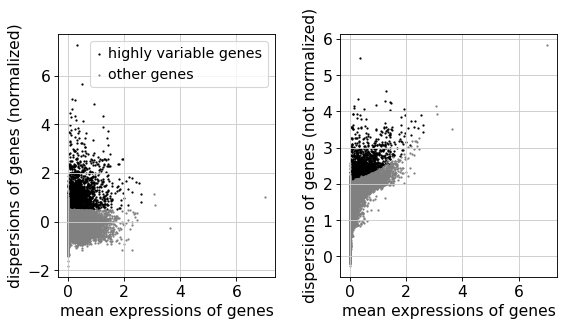

In [21]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key='batch_key')

print(sum(adata.var.highly_variable))
sc.pl.highly_variable_genes(adata)

In [22]:
# freeze the state in `.raw`
adata.raw = adata

In [23]:
# subset hvgs
adata = adata[:, adata.var.highly_variable]

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


## Save

In [24]:
adata.write(f'{adata_dir}/scVI/RNA_adult-8reg_pp.h5ad') # batch_key: Donor, Cell_or_Nuclei, and Kit_10X

In [25]:
adata

View of AnnData object with n_obs × n_vars = 684473 × 3063
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'donor_physical', 'donor_predicted', 'batch_key'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_name_multiome-2', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    obsm: 'latent_gene_encoding'
    layers: 'counts'